In [7]:
# Core libraries for data manipulation and analysis
import pandas as pd  # Handling data in DataFrame format
import numpy as np  # Essential for numerical computations

# Libraries for creating visualizations
import matplotlib.pyplot as plt  # Standard plotting library for static plots
import seaborn as sns  # For creating more advanced statistical visualizations

# Preprocessing and metrics for machine learning
from sklearn.preprocessing import RobustScaler  # Scaler to reduce the impact of outliers
from sklearn.metrics import silhouette_score  # To assess the quality of clustering

# Machine learning algorithms
from sklearn.linear_model import LinearRegression  # For performing linear regression
from sklearn.cluster import KMeans  # For applying K-Means clustering

# Disable unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings during execution


In [8]:
data = pd.read_csv('Car_sales.csv') # Load the dataset

In [11]:
data.head()  # Displays the first 5 rows of the dataset

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [13]:
data.info()  # Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [15]:
data=data.dropna()

In [17]:
numeric_columns = data.select_dtypes(include=['number'])  # Filters columns with numeric data types

In [19]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Sales_in_thousands,59.112316,32.299000,75.058933,3.169994,14.676451
__year_resale_value,18.031538,14.010000,11.605632,2.290997,5.640350
Price_in_thousands,25.969487,21.665000,14.149699,1.944910,4.152498
Engine_size,3.048718,3.000000,1.055169,1.122625,2.990561
Horsepower,181.282051,175.000000,58.591786,1.216837,3.190520
Wheelbase,107.326496,107.000000,8.050588,1.161745,3.202119
Width,71.189744,70.400000,3.530151,0.429649,-0.349781
Length,187.717949,187.800000,13.849926,0.067233,0.264777
Curb_weight,3.324051,3.340000,0.597177,0.208504,-0.102548
Fuel_capacity,17.812821,17.200000,3.794609,1.094260,2.346376


In [21]:
def draw_corr_heatmap(df):
    """
    GeneratesGenerates a correlation heatmap for numerical columns in the dataset. displaying triangle of correlations.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Mask the half of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create the heatmap with the mask applied
    plt.figure(figsize=(10, 8), dpi=150)
    sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
    plt.title('Half Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

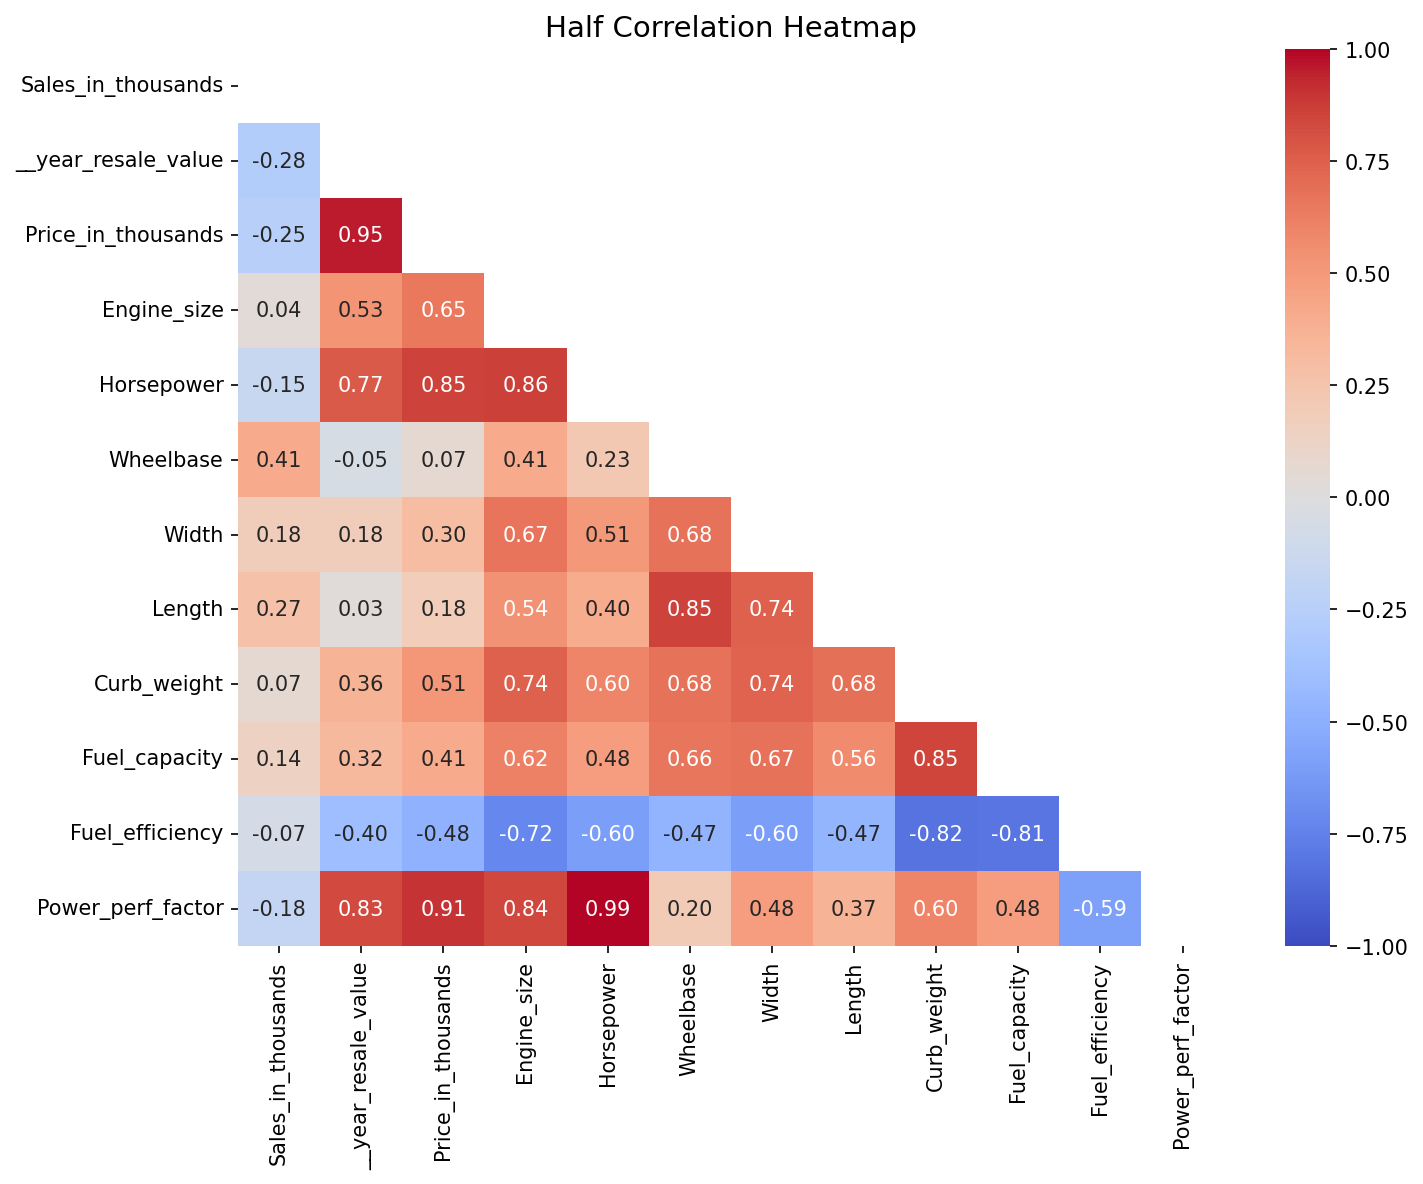

In [23]:
draw_corr_heatmap(numeric_columns)

In [51]:
def plot_lead_studio_bar_chart(df):
    """
    Creates a bar chart showing the distribution of films by lead studio.
    """
    studio_counts = df['Manufacturer'].value_counts()  # Count occurrences of each studio
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=studio_counts.index, y=studio_counts.values, hue=studio_counts,palette="viridis")
    plt.title("Number of Manufacturer", fontsize=14)
    plt.xlabel("Manufacturers", fontsize=12)
    plt.ylabel("count", fontsize=12)
    plt.xticks(rotation=45, ha="right")  # Rotate for better readability
    plt.tight_layout()
    plt.show()

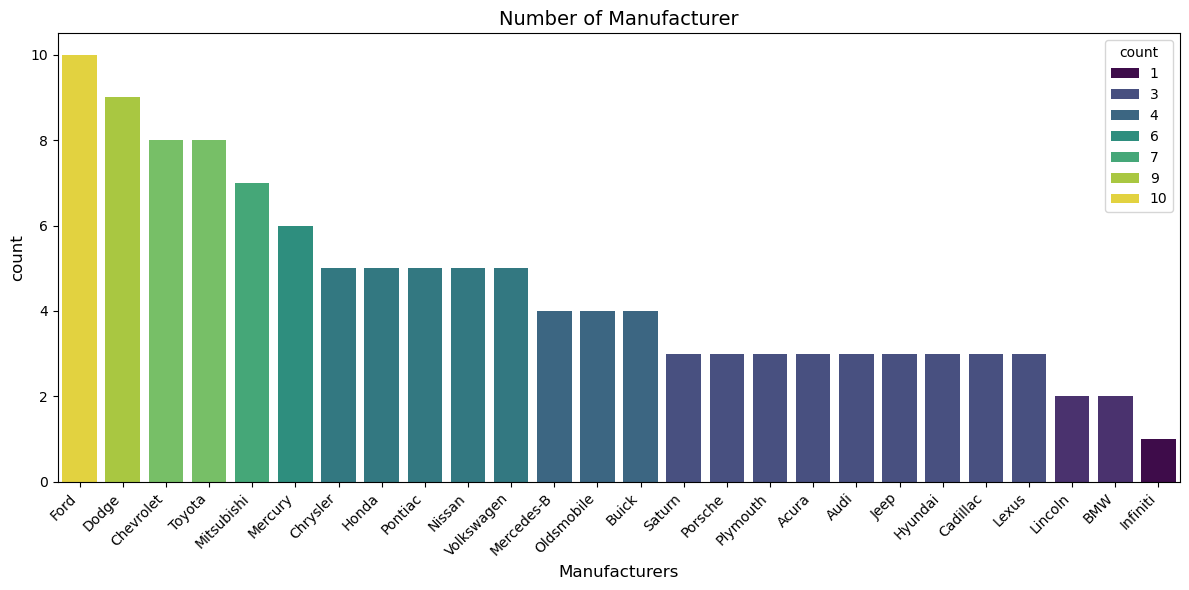

In [53]:
plot_lead_studio_bar_chart(data)

In [71]:
def simple_linear_fit_with_predictions(df, x_col, y_col, new_x=None):
    """
    Fits a simple linear regression model, plots the regression line with confidence intervals, 
    and optionally predicts values for new data points.
    
    Parameters:
    - df : DataFrame : The dataset containing the data.
    - x_col : str : The name of the independent variable (feature).
    - y_col : str : The name of the dependent variable (target).
    - new_x : array-like, optional : New data points to predict. Default is None.
    
    Returns:
    - model : LinearRegression : The trained linear regression model.
    - new_y_pred : array-like : Predictions for new data points (if provided).
    """
    # Step 1: Extract the data for X (independent) and Y (dependent) variables
    x = df[x_col].values.reshape(-1, 1)  # Reshape for a single feature
    y = df[y_col].values  # Dependent variable (target)

    # Step 2: Train the linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Step 3: Generate predictions for the original data
    y_pred = model.predict(x)
    
    # Step 4: Predict for new data points if provided
    new_y_pred = None
    if new_x is not None:
        new_x = np.array(new_x).reshape(-1, 1)
        new_y_pred = model.predict(new_x)
        print("Predictions for new data points:")
        for i, pred in enumerate(new_y_pred):
            print(f"  x = {new_x[i][0]:.2f}, Predicted y = {pred:.2f}")

    # Step 5: Plot the original data and the linear regression line with confidence intervals
    plt.figure(figsize=(10, 6))
    
    # Scatter plot and regression line with confidence intervals
    sns.regplot(x=x.flatten(), y=y, ci=95, scatter_kws={'color': 'yellow', 's': 50, 'alpha': 0.6}, 
                line_kws={'color': 'royalblue', 'linewidth': 3, 'linestyle': '--'})
    
    # Title and labels
    plt.title(f'Linear Regression of {y_col} vs {x_col} with 95% Confidence Interval', fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(['Data points', 'Regression line', 'Confidence interval'], loc='upper left', fontsize=12)

    # Additional plot customization
    plt.grid(True, linestyle=':', alpha=0.4)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return model, new_y_pred

Predictions for new data points:
  x = 400.00, Predicted y = 6.44
  x = 450.00, Predicted y = 7.22
  x = 300.00, Predicted y = 4.89


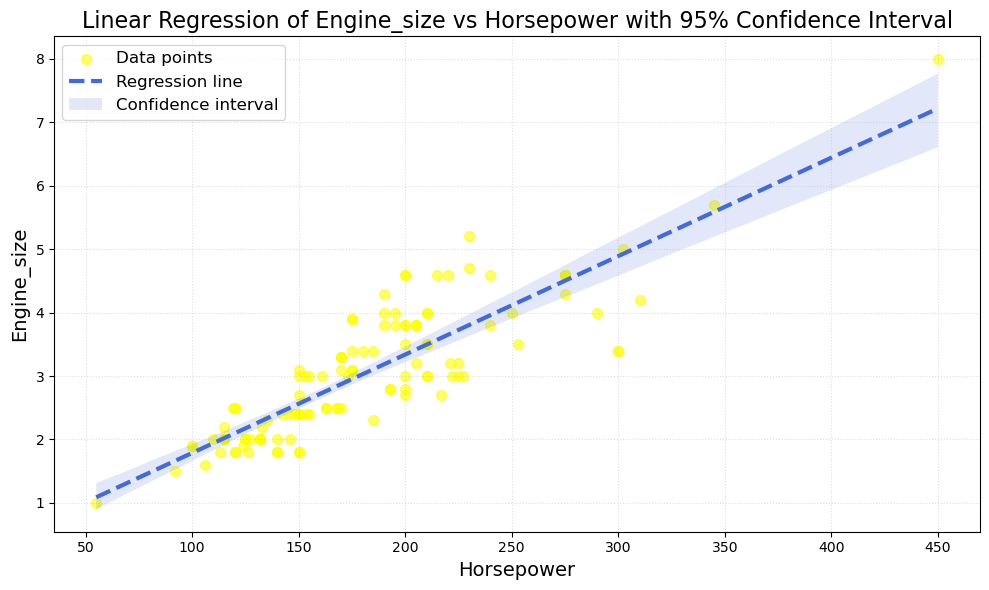

In [73]:
new_x = [400,450,300]  # New x-values for prediction
model, new_y_pred = simple_linear_fit_with_predictions(data, 'Horsepower', 'Engine_size', new_x)

In [57]:
data_for_clustering = data[['Horsepower', 'Engine_size']].copy()

# Step 2: Scale the data using RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [59]:
def compute_silhouette_and_inertia(cluster_count, data):
    """ 
    Calculates silhouette score and inertia for a given number of clusters.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, n_init=20)
    kmeans_model.fit(data)  # Fit the model to the data
    labels = kmeans_model.labels_
    
    # Calculate silhouette score and inertia
    silhouette = silhouette_score(data, labels)
    inertia = kmeans_model.inertia_

    return silhouette, inertia

In [61]:
wcss_values = []
optimal_cluster_count, best_silhouette_score = None, -np.inf

# Loop through possible cluster counts and calculate silhouette score and inertia
for clusters in range(2, 11):  # Test from 2 to 10 clusters
    silhouette, inertia = compute_silhouette_and_inertia(clusters, scaled_data)
    wcss_values.append(inertia)
    
    # Update the best silhouette score and optimal cluster count
    if silhouette > best_silhouette_score:
        optimal_cluster_count = clusters
        best_silhouette_score = silhouette
        
    print(f"{clusters} clusters silhouette score = {silhouette:.2f}")

print(f"Optimal number of clusters = {optimal_cluster_count}")

2 clusters silhouette score = 0.51
3 clusters silhouette score = 0.53
4 clusters silhouette score = 0.51
5 clusters silhouette score = 0.43
6 clusters silhouette score = 0.44
7 clusters silhouette score = 0.43
8 clusters silhouette score = 0.39
9 clusters silhouette score = 0.40
10 clusters silhouette score = 0.43
Optimal number of clusters = 3


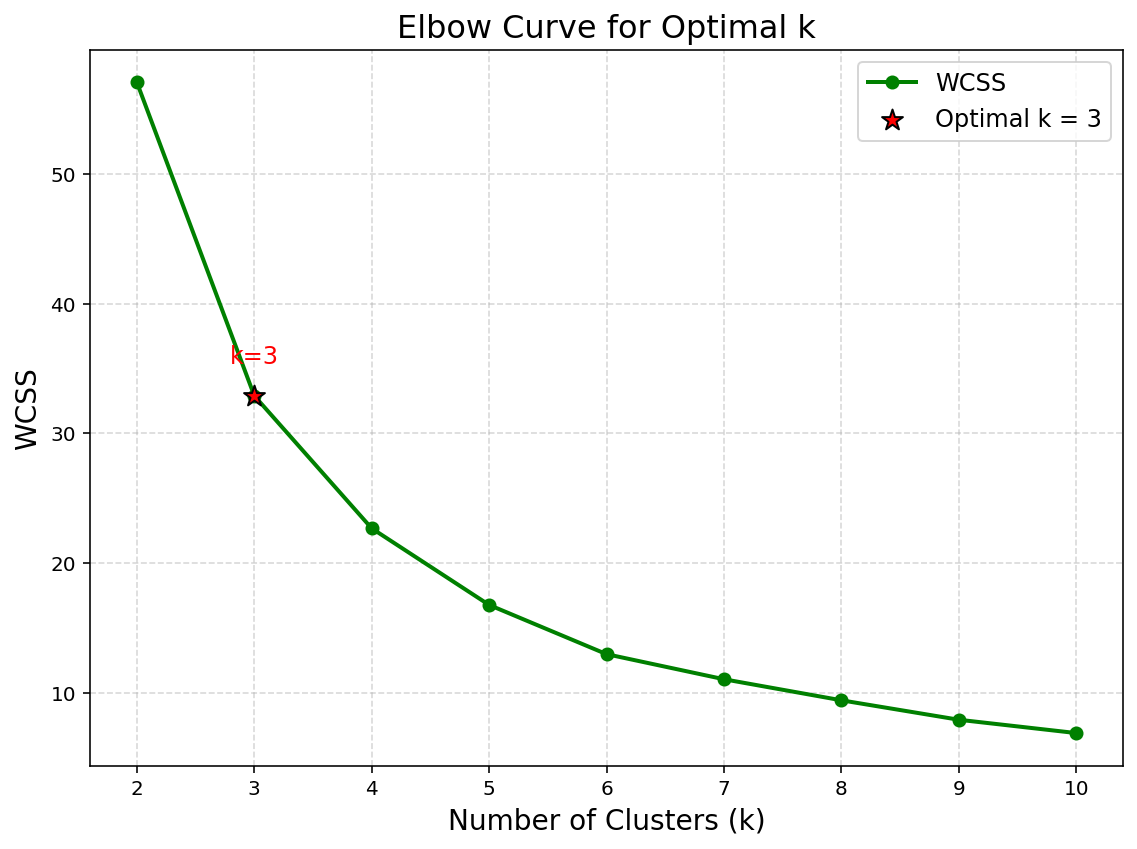

In [63]:
def plot_elbow_curve(min_clusters, max_clusters, wcss_values, optimal_clusters):
    '''
    Elbow Curve plot to determine the best number of clusters (k)
    '''
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    cluster_range = range(min_clusters, max_clusters + 1)
    ax.plot(cluster_range, wcss_values, marker='o', color='green', label='WCSS', markersize=6, linewidth=2)
    
    ax.scatter(optimal_clusters, wcss_values[optimal_clusters - min_clusters], color='red', edgecolor='black', s=120, zorder=5, marker='*', label=f'Optimal k = {optimal_clusters}')
    ax.annotate(f'k={optimal_clusters}',
                xy=(optimal_clusters, wcss_values[optimal_clusters - min_clusters]),
                xytext=(optimal_clusters, wcss_values[optimal_clusters - min_clusters] + (max(wcss_values) - min(wcss_values)) * 0.05),
                fontsize=12, color='red', ha='center')
    
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Curve for Optimal k', fontsize=16)
    ax.set_xticks(cluster_range)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot the elbow curve
plot_elbow_curve(2, 10, wcss_values, optimal_cluster_count)

In [65]:
def plot_kmeans_results(labels, original_data, centers, x_centers, y_centers, center_labels, k):
    """
    Plots the clustering results for the current number of clusters.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot the original data points, colored by their cluster labels
    sns.scatterplot(x=original_data[:, 0], y=original_data[:, 1], hue=labels, palette='deep', s=100, alpha=0.6)
    
    # Plot the cluster centers
    plt.scatter(x_centers, y_centers, color='black', marker='X', s=200, label="Cluster Centers")
    
    # Customize plot
    plt.title(f"K-Means Clustering with {k} Clusters", fontsize=16)
    plt.xlabel("Horsepower", fontsize=12)
    plt.ylabel("Engine Size", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

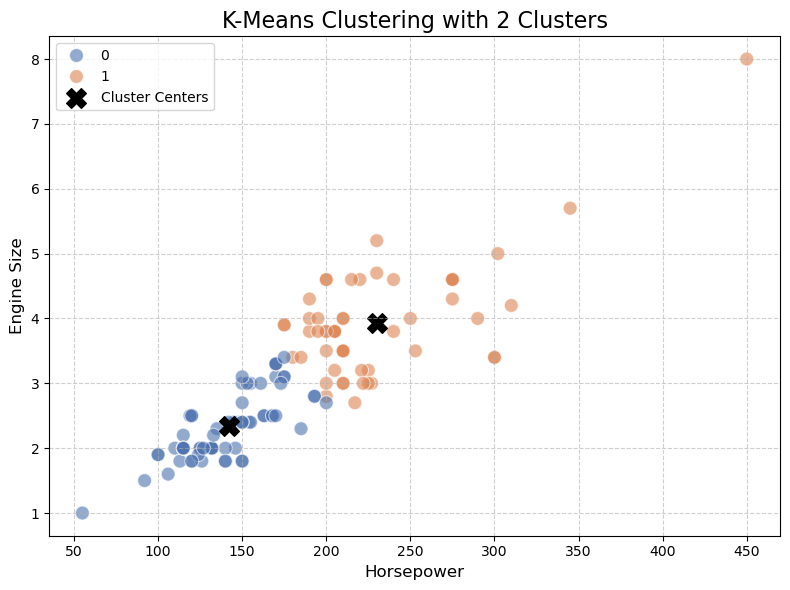

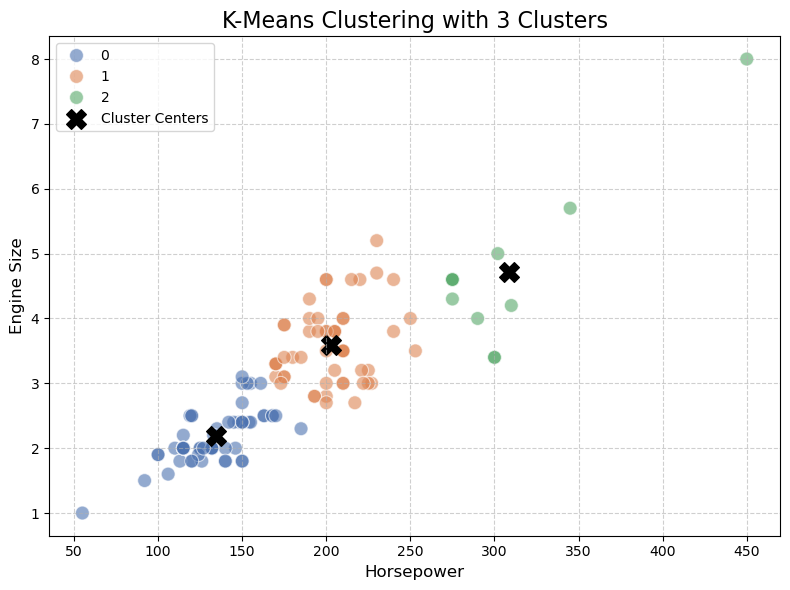

In [67]:
# Perform KMeans clustering for the optimal number of clusters
def perform_kmeans_clustering(original_data, normalized_data, scaler, cluster_range):
    """
    Performs K-Means clustering for a given range of k values and visualizes the results.
    Parameters: original_data (ndarray), normalized_data (ndarray), scaler (MinMaxScaler), cluster_range (iterable).
    """
    for k in cluster_range:
        # Initialize and fit K-Means with the current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(normalized_data)
        
        # Retrieve cluster labels and cluster centers
        labels = kmeans.labels_
        centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = centers[:, 0]
        y_centers = centers[:, 1]
        center_labels = kmeans.predict(kmeans.cluster_centers_)
        
        # Plot the results for the current k value
        plot_kmeans_results(labels, original_data, centers, x_centers, y_centers, center_labels, k)

# Inverse normalization for accurate plotting of the original data
inverse_norm = scaler.inverse_transform(scaled_data)

# Step 8: Perform KMeans clustering for k values in the range from 2 to 3
perform_kmeans_clustering(inverse_norm, scaled_data, scaler, cluster_range=range(2, 4))
